In [14]:
import common_functions as cf

# cf.download_data('EURUSD=X', '1y', '1h')
trading_data = cf.read_data('GBPUSD=X', '1y', '1h')
trading_data

Datetime      Open      High       Low     Close  Volume
0    2023-04-26 23:00:00+00:00  1.246805  1.247365  1.246805  1.247116       0
1    2023-04-27 00:00:00+00:00  1.247194  1.247287  1.246417  1.247178       0
2    2023-04-27 01:00:00+00:00  1.247085  1.247427  1.246401  1.247349       0
3    2023-04-27 02:00:00+00:00  1.247303  1.247676  1.247007  1.247630       0
4    2023-04-27 03:00:00+00:00  1.247443  1.247801  1.246821  1.247023       0
...                        ...       ...       ...       ...       ...     ...
6151 2024-04-26 16:00:00+00:00  1.247194  1.248954  1.247194  1.248673       0
6152 2024-04-26 17:00:00+00:00  1.248798  1.249360  1.248658  1.249266       0
6153 2024-04-26 18:00:00+00:00  1.249204  1.250344  1.249204  1.250344       0
6154 2024-04-26 19:00:00+00:00  1.250266  1.250344  1.249157  1.249797       0
6155 2024-04-26 20:00:00+00:00  1.249828  1.250094  1.249282  1.249438       0

[6156 rows x 6 columns]

In [6]:
import pandas_ta as ta
import pandas as pd

cf.set_indicators(trading_data, 200)

trading_data.index = pd.to_datetime(trading_data.index)

trading_data["VWAP"]=ta.vwap(trading_data.High, trading_data.Low, trading_data.Close, trading_data.Volume)
trading_data['RSI']=ta.rsi(trading_data.Close, length=16)
my_bbands = ta.bbands(trading_data.Close, length=14, std=2.0)
trading_data=trading_data.join(my_bbands)

trading_data.reset_index(inplace=True)

trading_data

index                  Datetime      Open  \
0    1970-01-01 00:00:00.000000000 2023-04-26 23:00:00+00:00  1.246805   
1    1970-01-01 00:00:00.000000001 2023-04-27 00:00:00+00:00  1.247194   
2    1970-01-01 00:00:00.000000002 2023-04-27 01:00:00+00:00  1.247085   
3    1970-01-01 00:00:00.000000003 2023-04-27 02:00:00+00:00  1.247303   
4    1970-01-01 00:00:00.000000004 2023-04-27 03:00:00+00:00  1.247443   
...                            ...                       ...       ...   
6151 1970-01-01 00:00:00.000006151 2024-04-26 16:00:00+00:00  1.247194   
6152 1970-01-01 00:00:00.000006152 2024-04-26 17:00:00+00:00  1.248798   
6153 1970-01-01 00:00:00.000006153 2024-04-26 18:00:00+00:00  1.249204   
6154 1970-01-01 00:00:00.000006154 2024-04-26 19:00:00+00:00  1.250266   
6155 1970-01-01 00:00:00.000006155 2024-04-26 20:00:00+00:00  1.249828   

          High       Low     Close  Volume       EMA      MACD  MACD_signal  \
0     1.247365  1.246805  1.247116       0       NaN       NaN          NaN   
1     1.247287  1.246417  1.247178       0       NaN       NaN          NaN   
2     1.247427  1.246401  1.247349       0       NaN       NaN          NaN   
3     1.247676  1.247007  1.247630       0       NaN       NaN          NaN   
4     1.247801  1.246821  1.247023       0       NaN       NaN          NaN   
...        ...       ...       ...     ...       ...       ...          ...   
6151  1.248954  1.247194  1.248673       0  1.246444 -0.000197     0.000336   
6152  1.249360  1.248658  1.249266       0  1.246472 -0.000206     0.000228   
6153  1.250344  1.249204  1.250344       0  1.246510 -0.000124     0.000158   
6154  1.250344  1.249157  1.249797       0  1.246543 -0.000102     0.000106   
6155  1.250094  1.249282  1.249438       0  1.246572 -0.000113     0.000062   

      ...        RSI        ADX    ADX_pos    ADX_neg  VWAP  BBL_14_2.0  \
0     ...        NaN        NaN        NaN        NaN   NaN         NaN   
1     ...        NaN        NaN        NaN        NaN   NaN         NaN   
2     ...        NaN        NaN        NaN        NaN   NaN         NaN   
3     ...        NaN        NaN        NaN        NaN   NaN         NaN   
4     ...        NaN        NaN        NaN        NaN   NaN         NaN   
...   ...        ...        ...        ...        ...   ...         ...   
6151  ...  46.513746  23.570157  22.450085  30.002476   NaN    1.246731   
6152  ...  48.805969  22.645213  23.512664  29.100704   NaN    1.246648   
6153  ...  52.734859  21.159020  26.649096  27.647336   NaN    1.246658   
6154  ...  50.631530  19.807407  25.236016  26.390614   NaN    1.246610   
6155  ...  49.255374  18.552337  24.287045  25.398225   NaN    1.246525   

      BBM_14_2.0  BBU_14_2.0  BBB_14_2.0  BBP_14_2.0  
0            NaN         NaN         NaN         NaN  
1            NaN         NaN         NaN         NaN  
2            NaN         NaN         NaN         NaN  
3            NaN         NaN         NaN         NaN  
4            NaN         NaN         NaN         NaN  
...          ...         ...         ...         ...  
6151    1.250170    1.253609    0.550125    0.282408  
6152    1.250117    1.253587    0.555107    0.377318  
6153    1.250130    1.253601    0.555406    0.530842  
6154    1.250079    1.253549    0.555020    0.459276  
6155    1.249962    1.253399    0.549911    0.423695  

[6156 rows x 22 columns]

In [7]:
VWAPsignal = [0]*len(trading_data)
backcandles = 15

for row in range(backcandles, len(trading_data)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if max(trading_data.Open[i], trading_data.Close[i])>=trading_data.VWAP[i]:
            dnt=0
        if min(trading_data.Open[i], trading_data.Close[i])<=trading_data.VWAP[i]:
            upt=0
    if upt==1 and dnt==1:
        VWAPsignal[row]=0
    elif upt==1:
        VWAPsignal[row]=1
    elif dnt==1:
        VWAPsignal[row]=-1

trading_data['VWAPSignal'] = VWAPsignal

In [12]:
import common_trade_signals as cts

def TotalSignal(l):
    if ((trading_data.Close[l]<=trading_data['BBL_14_2.0'][l])
        and (trading_data.RSI[l]<45)):
            return 1
    if ((trading_data.Close[l]>=trading_data['BBU_14_2.0'][l])
        and (trading_data.RSI[l]>55)):
            return -1
    # if ((trading_data.VWAPSignal[l]==1)
    #     and (trading_data.Close[l]<=trading_data['BBL_14_2.0'][l])):
    #     # and trading_data.RSI[l]<45):
    #         return 1
    # if ((trading_data.VWAPSignal[l]==-1)
    #     and (trading_data.Close[l]>=trading_data['BBU_14_2.0'][l])):
    #     # and trading_data.RSI[l]>55):
    #         return -1
    return 0

TotSignal = [0]*len(trading_data)
for row in range(backcandles, len(trading_data)): #careful backcandles used previous cell
    TotSignal[row] = TotalSignal(row)
trading_data['Total_trade_signal'] = TotSignal

# cf.set_trade_signals(trading_data, cts.total_macd_trade_signal)
print(trading_data[trading_data.Total_trade_signal!=0].count())
trading_data

index                 734
Datetime              734
Open                  734
High                  734
Low                   734
Close                 734
Volume                734
EMA                   713
MACD                  734
MACD_signal           734
MACD_histogram        734
ATR                   734
RSI                   734
ADX                   734
ADX_pos               734
ADX_neg               734
VWAP                    0
BBL_14_2.0            734
BBM_14_2.0            734
BBU_14_2.0            734
BBB_14_2.0            734
BBP_14_2.0            734
VWAPSignal            734
Total_trade_signal    734
dtype: int64


index                  Datetime      Open  \
0    1970-01-01 00:00:00.000000000 2023-04-26 23:00:00+00:00  1.246805   
1    1970-01-01 00:00:00.000000001 2023-04-27 00:00:00+00:00  1.247194   
2    1970-01-01 00:00:00.000000002 2023-04-27 01:00:00+00:00  1.247085   
3    1970-01-01 00:00:00.000000003 2023-04-27 02:00:00+00:00  1.247303   
4    1970-01-01 00:00:00.000000004 2023-04-27 03:00:00+00:00  1.247443   
...                            ...                       ...       ...   
6151 1970-01-01 00:00:00.000006151 2024-04-26 16:00:00+00:00  1.247194   
6152 1970-01-01 00:00:00.000006152 2024-04-26 17:00:00+00:00  1.248798   
6153 1970-01-01 00:00:00.000006153 2024-04-26 18:00:00+00:00  1.249204   
6154 1970-01-01 00:00:00.000006154 2024-04-26 19:00:00+00:00  1.250266   
6155 1970-01-01 00:00:00.000006155 2024-04-26 20:00:00+00:00  1.249828   

          High       Low     Close  Volume       EMA      MACD  MACD_signal  \
0     1.247365  1.246805  1.247116       0       NaN       NaN          NaN   
1     1.247287  1.246417  1.247178       0       NaN       NaN          NaN   
2     1.247427  1.246401  1.247349       0       NaN       NaN          NaN   
3     1.247676  1.247007  1.247630       0       NaN       NaN          NaN   
4     1.247801  1.246821  1.247023       0       NaN       NaN          NaN   
...        ...       ...       ...     ...       ...       ...          ...   
6151  1.248954  1.247194  1.248673       0  1.246444 -0.000197     0.000336   
6152  1.249360  1.248658  1.249266       0  1.246472 -0.000206     0.000228   
6153  1.250344  1.249204  1.250344       0  1.246510 -0.000124     0.000158   
6154  1.250344  1.249157  1.249797       0  1.246543 -0.000102     0.000106   
6155  1.250094  1.249282  1.249438       0  1.246572 -0.000113     0.000062   

      ...    ADX_pos    ADX_neg  VWAP  BBL_14_2.0  BBM_14_2.0  BBU_14_2.0  \
0     ...        NaN        NaN   NaN         NaN         NaN         NaN   
1     ...        NaN        NaN   NaN         NaN         NaN         NaN   
2     ...        NaN        NaN   NaN         NaN         NaN         NaN   
3     ...        NaN        NaN   NaN         NaN         NaN         NaN   
4     ...        NaN        NaN   NaN         NaN         NaN         NaN   
...   ...        ...        ...   ...         ...         ...         ...   
6151  ...  22.450085  30.002476   NaN    1.246731    1.250170    1.253609   
6152  ...  23.512664  29.100704   NaN    1.246648    1.250117    1.253587   
6153  ...  26.649096  27.647336   NaN    1.246658    1.250130    1.253601   
6154  ...  25.236016  26.390614   NaN    1.246610    1.250079    1.253549   
6155  ...  24.287045  25.398225   NaN    1.246525    1.249962    1.253399   

      BBB_14_2.0  BBP_14_2.0  VWAPSignal  Total_trade_signal  
0            NaN         NaN           0                   0  
1            NaN         NaN           0                   0  
2            NaN         NaN           0                   0  
3            NaN         NaN           0                   0  
4            NaN         NaN           0                   0  
...          ...         ...         ...                 ...  
6151    0.550125    0.282408           0                   0  
6152    0.555107    0.377318           0                   0  
6153    0.555406    0.530842           0                   0  
6154    0.555020    0.459276           0                   0  
6155    0.549911    0.423695           0                   0  

[6156 rows x 24 columns]

/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_58461/3889505355.py:28: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(trading_data, MyStrat, cash=20000, margin=1/10, commission=0.00)
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                    6155.0
Duration                               6155.0
Exposure Time [%]                   23.018194
Equity Final [$]                 20000.145833
Equity Peak [$]                  20000.158718
Return [%]                           0.000729
Buy & Hold Return [%]                0.186167
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.000373
Avg. Drawdown [%]                   -0.000061
Max. Drawdown Duration                 3040.0
Avg. Drawdown Duration             155.552632
# Trades                                217.0
Win Rate [%]                        40.552995
Best Trade [%]                       0.534853
Worst Trade [%]                     -0.313293
Avg. Trade [%]                    

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


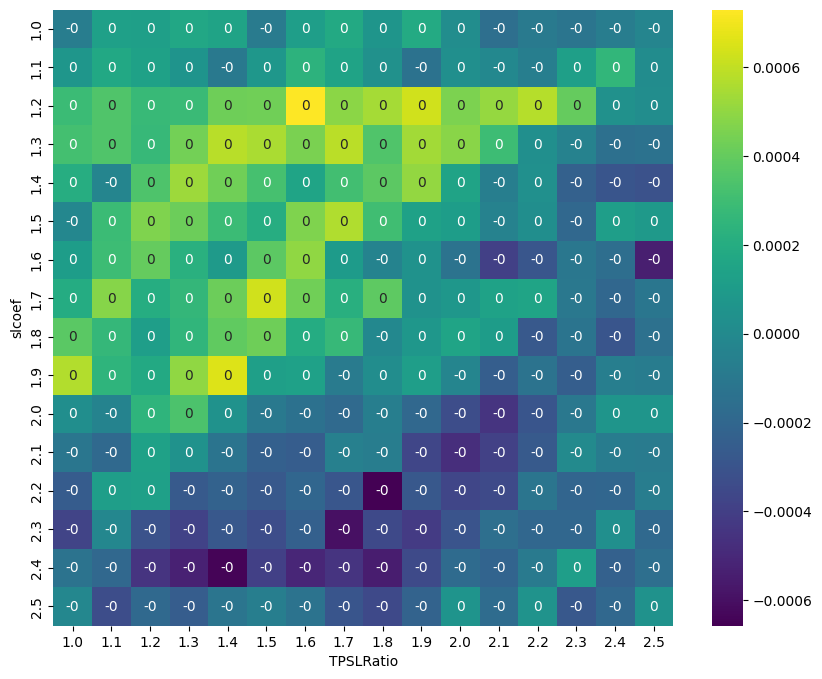

In [13]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5

    def init(self):
        super().init()
        self.signal1 = self.I(lambda: self.data.Total_trade_signal)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

backtest = Backtest(trading_data, MyStrat, cash=20000, margin=1/10, commission=0.00)
stats, heatmap = backtest.optimize(slcoef=[i/10 for i in range(10, 26)],
                                    TPSLRatio=[i/10 for i in range(10, 26)],
                                    maximize='Return [%]', max_tries=300,
                                    random_state=0,
                                    return_heatmap=True)

print(stats)
backtest.plot()
cf.show_heatmap(heatmap)


In [8]:
import common_trade_signals as cts

cf.set_trade_signals(trading_data, cts.total_macd_ema_trade_signal)
trading_data

100%|██████████| 8755/8755 [00:00<00:00, 48678.91it/s]

number of trades: 197


Datetime          Open          High           Low  \
0    2023-04-26 22:00:00+00:00  28686.220703  28686.220703  28229.384766   
1    2023-04-26 23:00:00+00:00  28305.537109  28450.632812  28290.832031   
2    2023-04-27 00:00:00+00:00  28428.464844  29452.402344  28402.886719   
3    2023-04-27 01:00:00+00:00  29268.369141  29326.994141  28584.007812   
4    2023-04-27 02:00:00+00:00  28744.066406  29069.574219  28744.066406   
...                        ...           ...           ...           ...   
8750 2024-04-26 18:00:00+00:00  63977.789062  64114.113281  63942.917969   
8751 2024-04-26 19:00:00+00:00  64041.187500  64097.558594  63799.289062   
8752 2024-04-26 20:00:00+00:00  63803.207031  64070.699219  63803.207031   
8753 2024-04-26 21:00:00+00:00  63944.292969  64051.371094  63830.152344   
8754 2024-04-26 22:00:00+00:00  64047.824219  64047.824219  63777.523438   

             Close           EMA        MACD  MACD_signal  MACD_histogram  \
0     28307.880859           NaN         NaN          NaN             NaN   
1     28417.242188           NaN         NaN          NaN             NaN   
2     29294.464844           NaN         NaN          NaN             NaN   
3     28735.347656           NaN         NaN          NaN             NaN   
4     29054.978516           NaN         NaN          NaN             NaN   
...            ...           ...         ...          ...             ...   
8750  64038.597656  64942.321986 -146.448989  -109.632592      -36.816396   
8751  63877.546875  64931.727208 -149.128321  -117.531738      -31.596583   
8752  63900.398438  64921.465231 -147.705128  -123.566416      -24.138712   
8753  64051.371094  64912.807577 -132.863439  -125.425821       -7.437618   
8754  63847.597656  64902.208474 -135.976652  -127.535987       -8.440666   

             ATR        RSI        ADX    ADX_pos    ADX_neg  \
0            NaN        NaN        NaN        NaN        NaN   
1            NaN        NaN        NaN        NaN        NaN   
2            NaN        NaN        NaN        NaN        NaN   
3            NaN        NaN        NaN        NaN        NaN   
4            NaN        NaN        NaN        NaN        NaN   
...          ...        ...        ...        ...        ...   
8750  430.222927  47.084610  16.160382  20.276101  22.247743   
8751  411.372442  44.545456  15.736601  19.219114  23.598232   
8752  390.818120  44.998688  15.343089  18.297874  22.467086   
8753  366.589639  48.021259  14.977686  17.548705  21.547216   
8754  353.340784  44.469075  14.805935  16.640433  21.426679   

      EMA_trade_signal  MACD_trade_signal  RSI_trade_signal  ADX_trade_signal  \
0                    0                  0                 0                 0   
1                    0                  0                 0                 0   
2                    0                  0                 0                 0   
3                    0                  0                 0                 0   
4                    0                  0                 0                 0   
...                ...                ...               ...               ...   
8750                -1                  0                 0                 0   
8751                -1                  0                 0                 0   
8752                -1                  0                 0                 0   
8753                -1                  0                 0                 0   
8754                -1                  0                 0                 0   

      Total_trade_signal  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
8750                   0  
8751                   0  
8752                   0  
8753                   0  
8754                   0  

[8755 rows x 19 columns]

/Users/andrew/github/trading-strategies/ddd-southwest/common_functions.py:199: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  return backtest, stats, heatmap
/Users/andrew/github/trading-strategies/ddd-southwest/common_functions.py:199: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  return backtest, stats, heatmap
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                    8754.0
Duration                               8754.0
Exposure Time [%]                   48.315248
Equity Final [$]                 70627.632207
Equity Peak [$]                 104649.552307
Return [%]                         182.510529
Buy & Hold Return [%]              125.547076
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -34.996747
Avg. Drawdown [%]                   -3.771702
Max. Drawdown Duration                 1861.0
Avg. Drawdown Duration                98.0875
# Trades                                 97.0
Win Rate [%]                        39.175258
Best Trade [%]                      11.336938
Worst Trade [%]                     -5.224221
Avg. Trade [%]                    

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


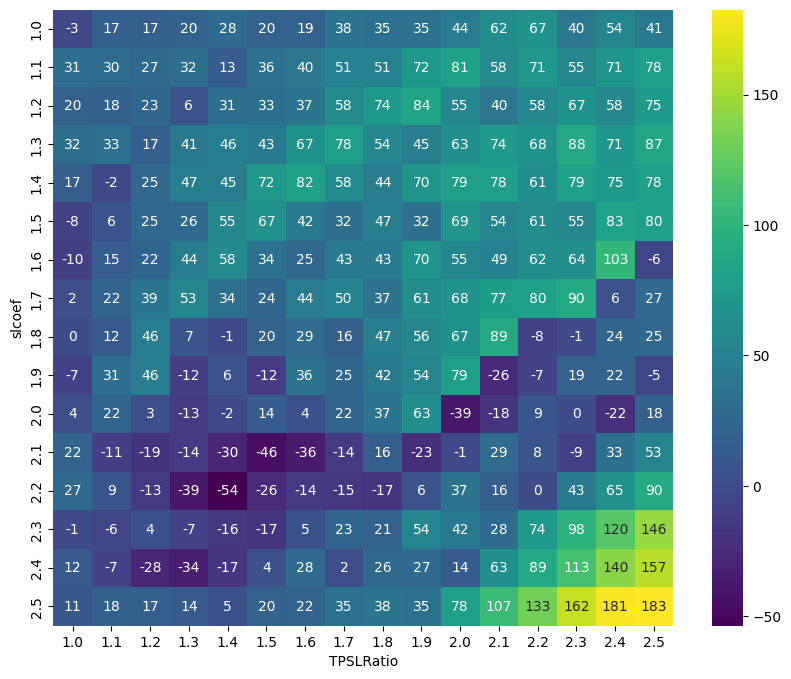

In [9]:
backtest, stats, heatmap = cf.backtest_trading(trading_data, 25000)

print(stats)
backtest.plot()
cf.show_heatmap(heatmap)
